# Financial Mathematics: Black-Scholes model

The purpose of this project is to estimate various option prices in Black-Scholes model using variance reduction methods.
Options include:
- European Options,
- Asian Option,
- more complex options.  


Estimation techniques include:
- standard Monte Carlo,
- control variates (with modifications),
- antithetic variates,
- importance sampling,
- stratified sampling.


For each method, the variance estimator will be calculated:
$$S_n^2 = \frac{1}{n-1} \sum_{k=1}^n (X_k - \overline{X})^2$$

by using numpy method with `ddof` (degrees of freedom parameter). According to [np.var documentation](https://numpy.org/doc/2.1/reference/generated/numpy.var.html), in order to calculate variance esitmator $S_n^2$ of an array $x$, we compute 

`np.var(x, ddof=1)`.

### Imports

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

from src.euro_option import (
    estimate_mc_classic,
    estimate_mc_control_variates,
    estimate_mc_control_turbo,
    estimate_mc_antithetic,
    estimate_mc_stratified,
    estimate_mc_importance_sampling
)

from src.visualization import (
    plot_mc_convergence, 
    plot_importance_sampling_variance
)

from src.asian_option import BSAsianOption

### Monte Carlo Pricing of European Call Option in Black-Scholes Model - classical approach

In [2]:
def d(type_, S0, T, K, sigma, r):
    assert type_ in ["+", "-"]
    if type_ == "+":
        return (np.log(S0/K) + ((r + (sigma**2/2))*T))
    else:
        return (np.log(S0/K) + ((r - (sigma**2/2))*T))

#### Market parameters

In [3]:
S0 = 100
r = 0.1
T = 1
sigma = 1
K1 = 80
K2 = 120
n = 100_000

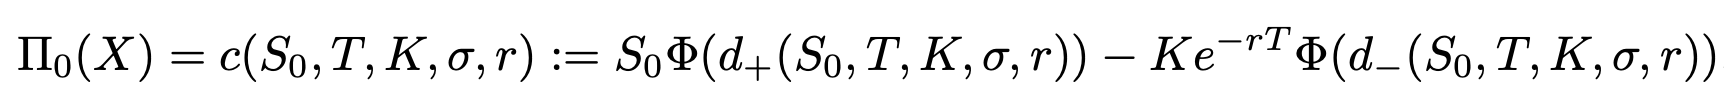

In [4]:
def bs_call(S0, T, K, sigma, r):
    return (S0 * norm.cdf(d('+', S0, T, K, sigma, r))) - (K * np.exp(-r * T) * norm.cdf(d('-', S0, T, K, sigma, r)))

#### Theoretical values

In [5]:
theoretical_inthemoney = bs_call(S0, T, 80, sigma, r)
theoretical_outofthemoney = bs_call(S0, T, 120, sigma, r)
print(f"Theoretical in-the-money call option price: {theoretical_inthemoney:.2f}")
print(f"Theoretical out-of-the-money call option price: {theoretical_outofthemoney:.2f}")

Theoretical in-the-money call option price: 48.37
Theoretical out-of-the-money call option price: 35.77


InTheMoney

Model: Classic Monte Carlo
Option type: In-the-money
Parameters: S0=100, K=80, sigma=1, r=0.1, T=1, num_samples=100000
Theoretical value: 48.3660
Estimated value: 48.5163
Variance: 0.1479
--------------------------------------------------


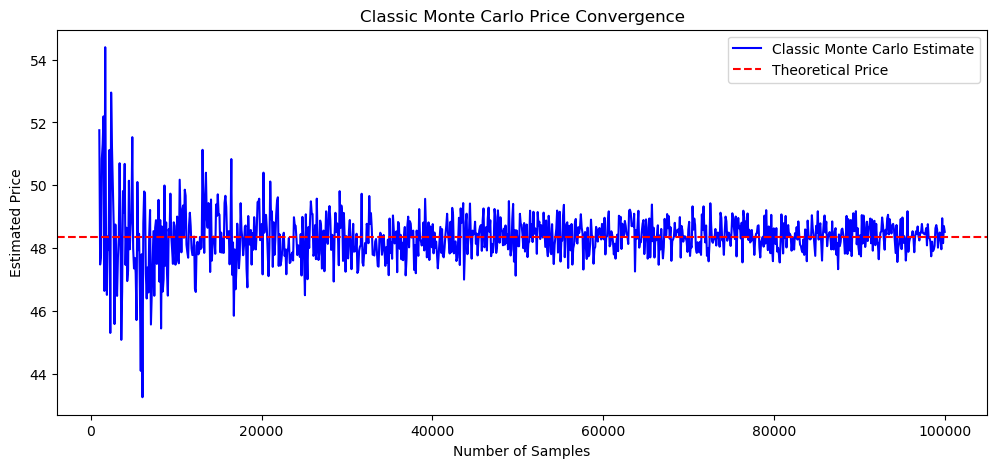

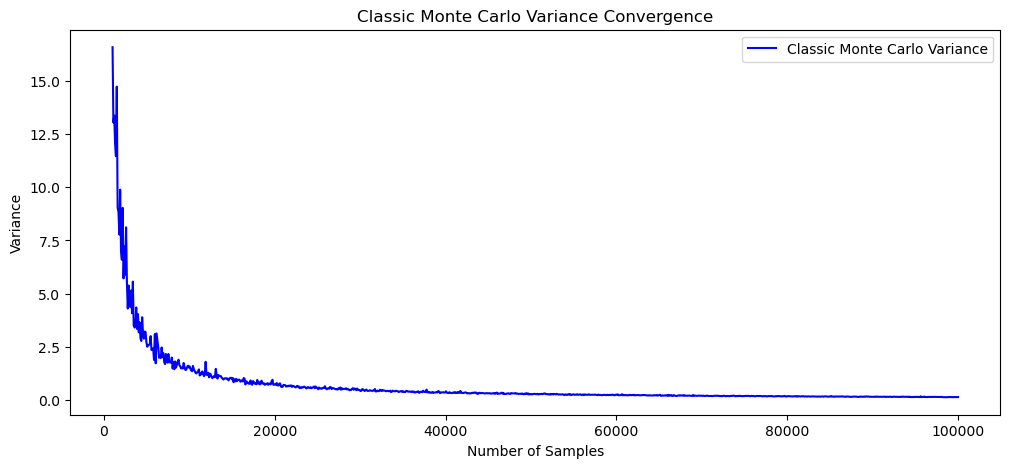

In [12]:
plot_mc_convergence(estimate_mc_classic, S0, T, K1, sigma, r, n, "Classic Monte Carlo", theoretical_inthemoney, 1000, 1000)

OutOfTheMoney

Model: Classic Monte Carlo
Option type: Out-of-the-money
Parameters: S0=100, K=120, sigma=1, r=0.1, T=1, num_samples=100000
Theoretical value: 35.7693
Estimated value: 35.5325
Variance: 0.1254
--------------------------------------------------


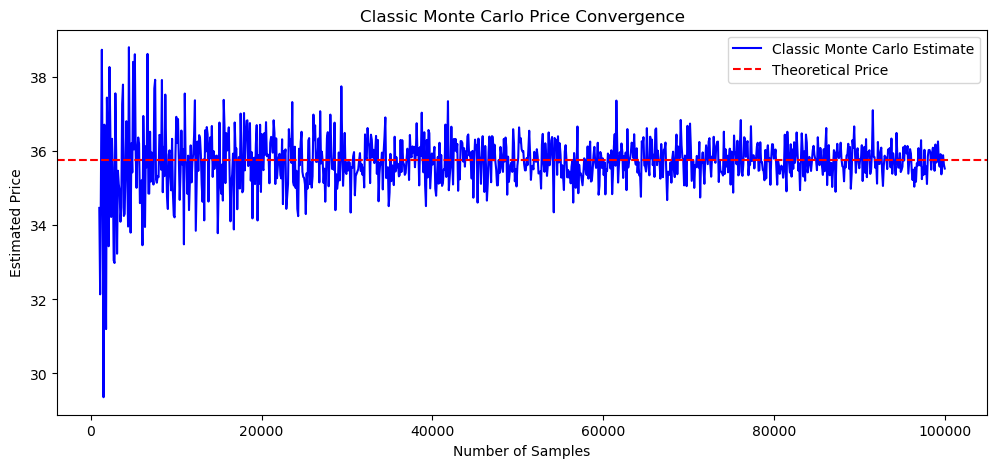

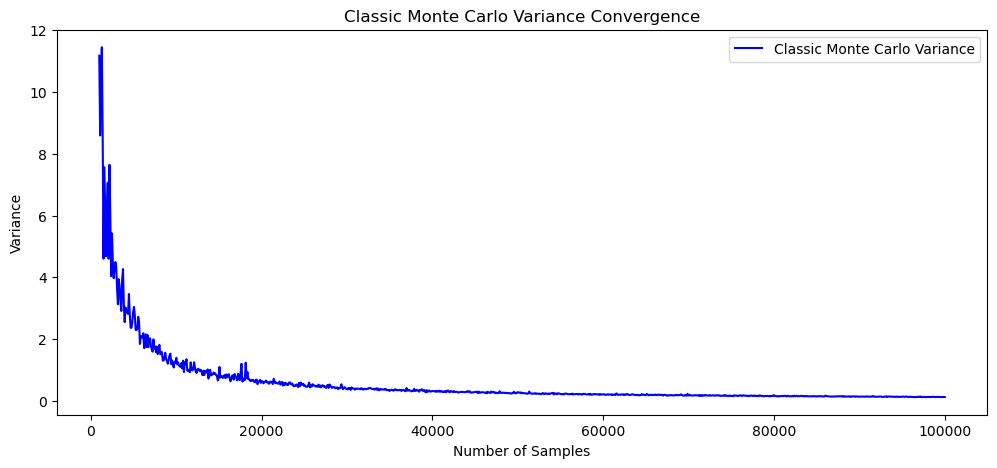

In [52]:
plot_mc_convergence(estimate_mc_classic, S0, T, K2, sigma, r, n, "Classic Monte Carlo", theoretical_outofthemoney, 1000, 1000)

### Monte Carlo Pricing of European Call Option in Black-Scholes Model - variance reduction approach

#### Control variates 

InTheMoney

Model: Control Variates Monte Carlo
Option type: In-the-money
Parameters: S0=100, K=80, sigma=1, r=0.1, T=1, num_samples=100000
Theoretical value: 48.3660
Estimated value: 48.4299
Variance: 0.0042
--------------------------------------------------


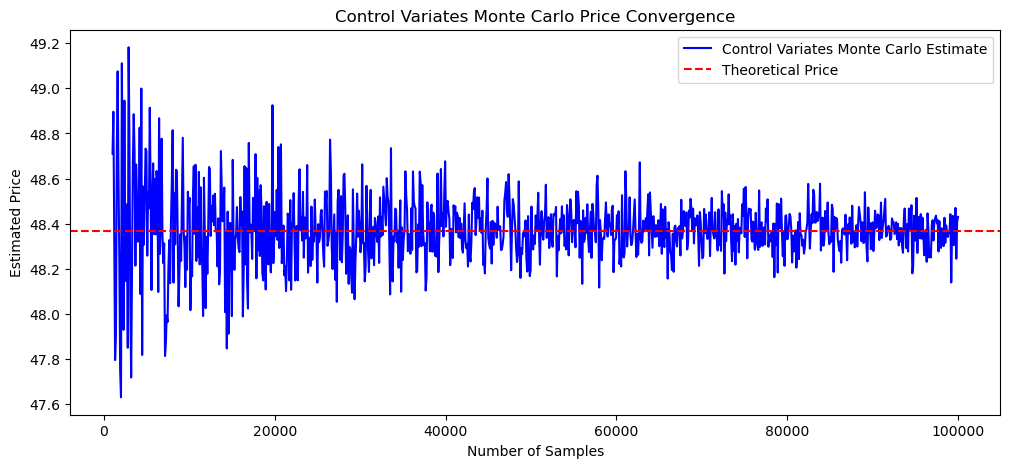

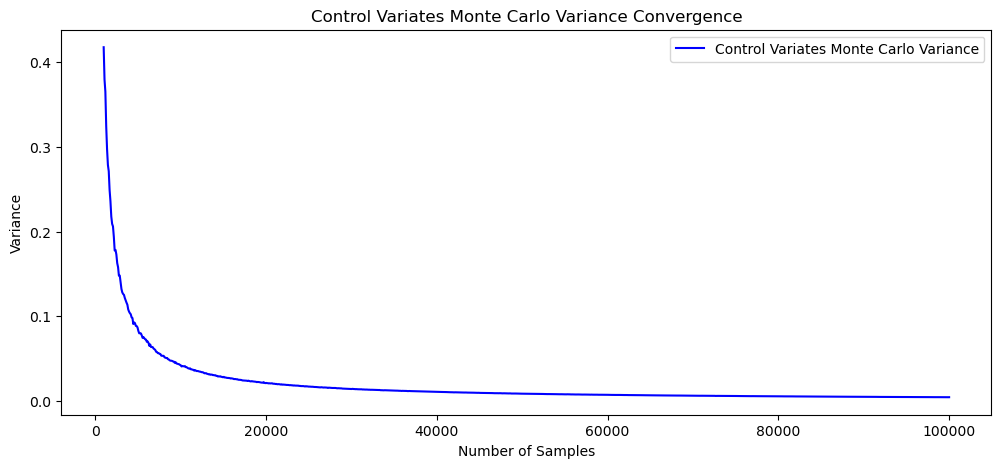

In [54]:
plot_mc_convergence(estimate_mc_control_variates, S0, T, K1, sigma, r, n, "Control Variates Monte Carlo", theoretical_inthemoney, 1000, 1000)

OutOfTheMoney

Model: Control Variates Monte Carlo
Option type: Out-of-the-money
Parameters: S0=100, K=120, sigma=1, r=0.1, T=1, num_samples=100000
Theoretical value: 35.7693
Estimated value: 35.8787
Variance: 0.0107
--------------------------------------------------


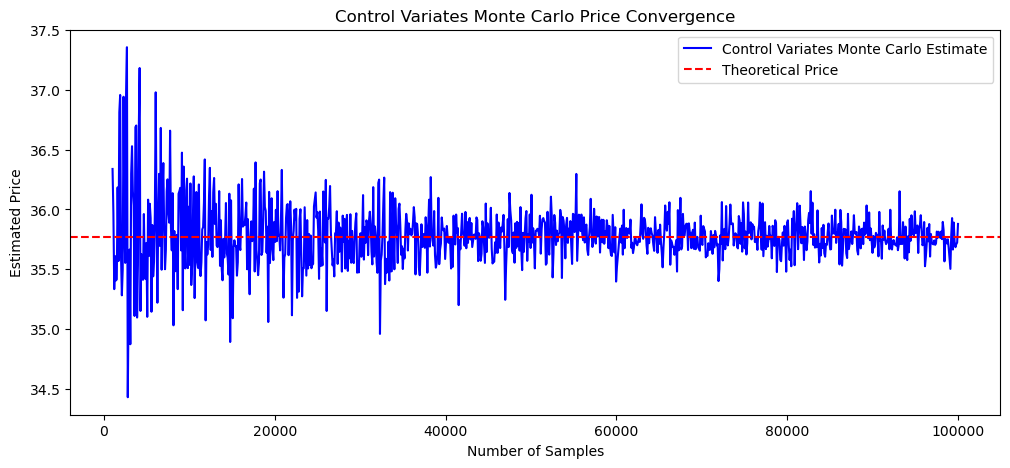

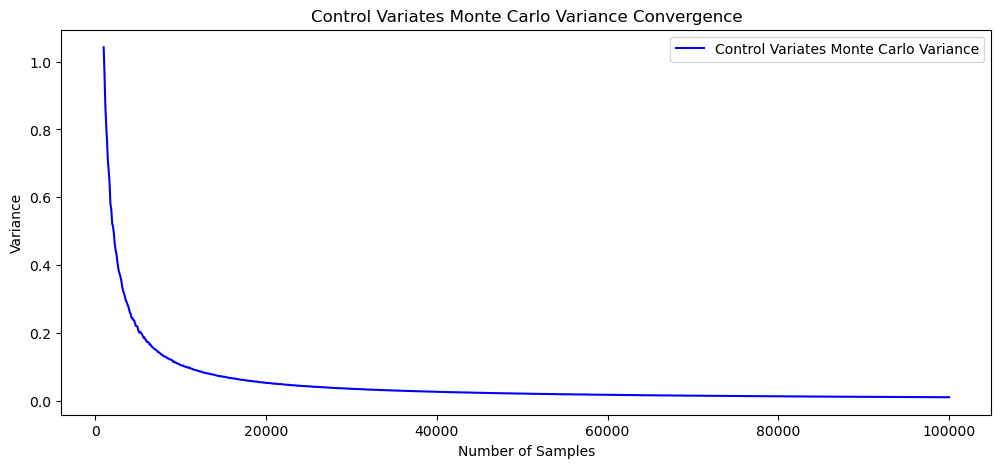

In [55]:
plot_mc_convergence(estimate_mc_control_variates, S0, T, K2, sigma, r, n, "Control Variates Monte Carlo", theoretical_outofthemoney, 1000, 1000)

#### Control variates "turbo"

InTheMoney

Model: Control Variates Turbo Monte Carlo
Option type: In-the-money
Parameters: S0=100, K=80, sigma=1, r=0.1, T=1, num_samples=100000
Theoretical value: 48.3660
Estimated value: 48.2439
Variance: 0.0031
--------------------------------------------------


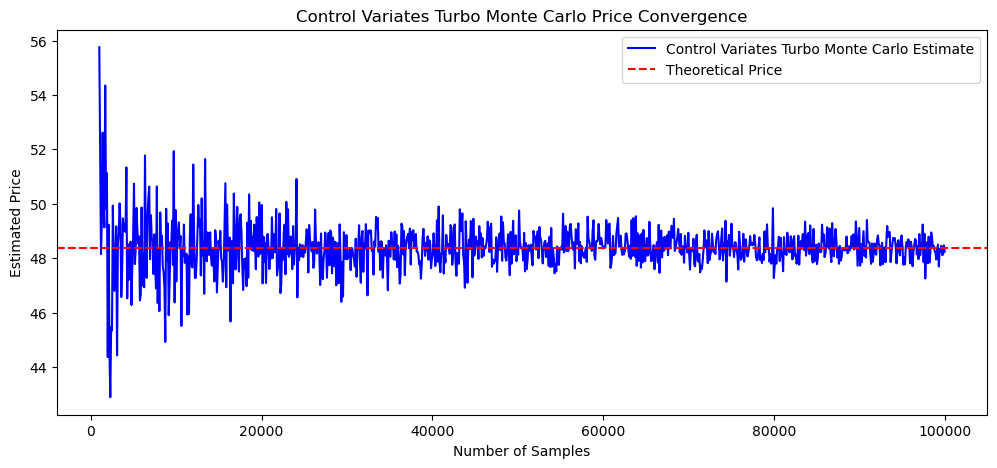

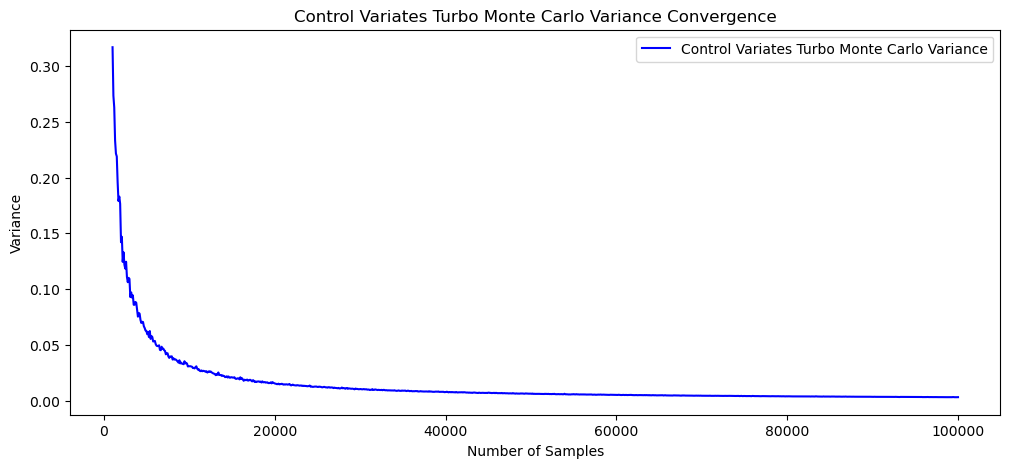

In [57]:
plot_mc_convergence(estimate_mc_control_turbo, S0, T, K1, sigma, r, n, "Control Variates Turbo Monte Carlo", theoretical_inthemoney, 1000, 1000)

OutOfTheMoney

Model: Control Variates Turbo Monte Carlo
Option type: Out-of-the-money
Parameters: S0=100, K=120, sigma=1, r=0.1, T=1, num_samples=100000
Theoretical value: 35.7693
Estimated value: 34.9667
Variance: 0.0065
--------------------------------------------------


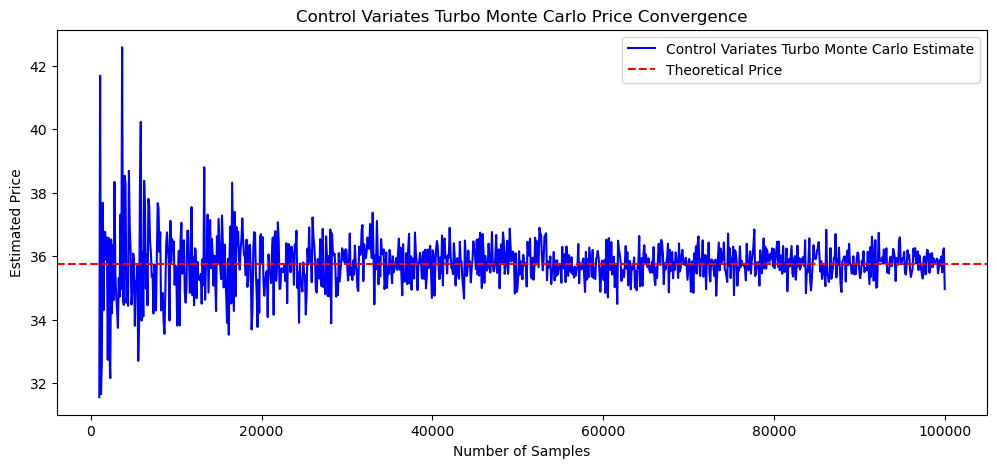

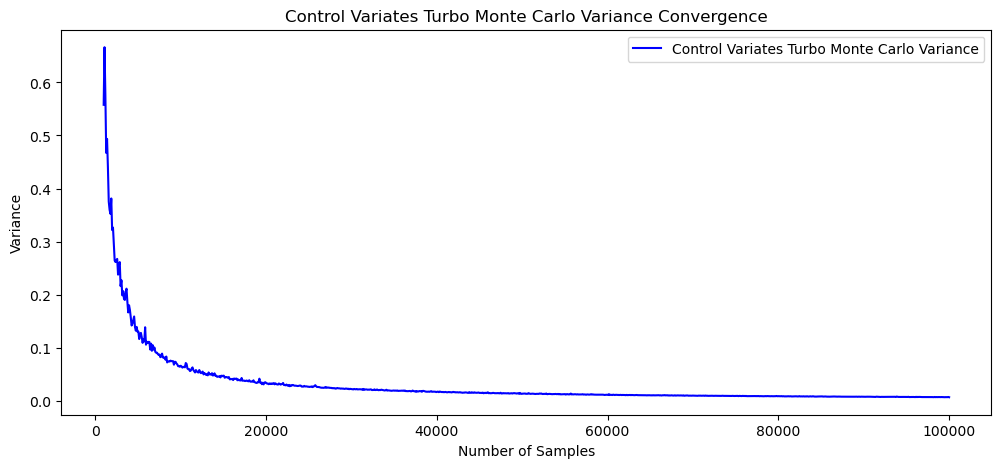

In [58]:
plot_mc_convergence(estimate_mc_control_turbo, S0, T, K2, sigma, r, n, "Control Variates Turbo Monte Carlo", theoretical_outofthemoney, 1000, 1000)

#### Antithetic variates

InTheMoney

Model: Antithetic Variates Monte Carlo
Option type: In-the-money
Parameters: S0=100, K=80, sigma=1, r=0.1, T=1, num_samples=100000
Theoretical value: 48.3660
Estimated value: 48.3694
Variance: 0.0590
--------------------------------------------------


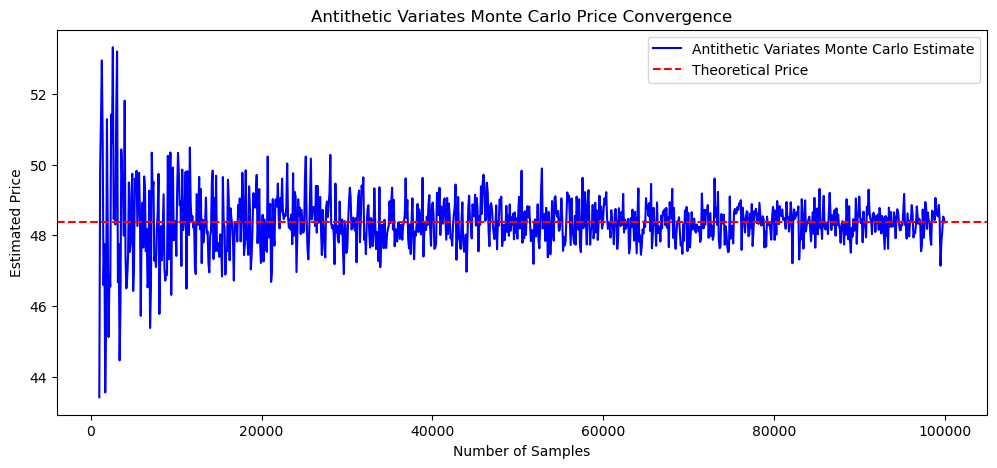

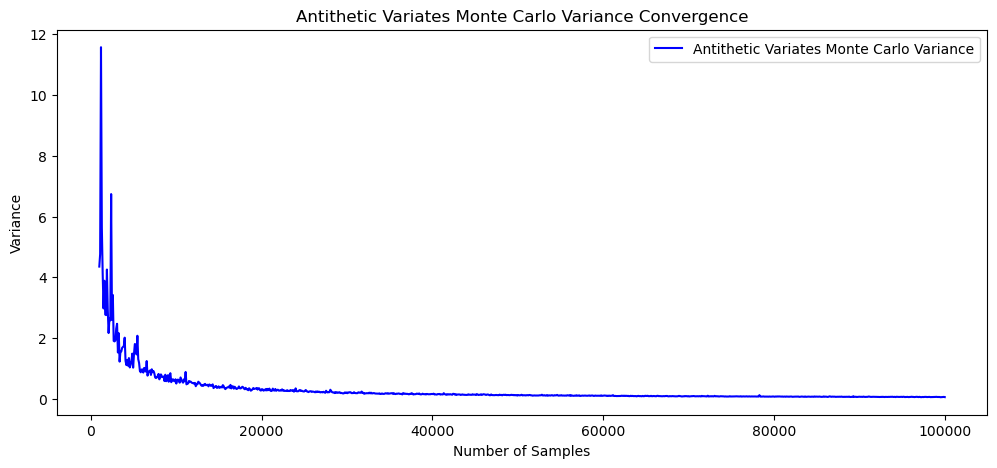

In [60]:
plot_mc_convergence(estimate_mc_antithetic, S0, T, K1, sigma, r, n, "Antithetic Variates Monte Carlo", theoretical_inthemoney, 1000, 1000)

OutOfTheMoney

Model: Antithetic Variates Monte Carlo
Option type: Out-of-the-money
Parameters: S0=100, K=120, sigma=1, r=0.1, T=1, num_samples=100000
Theoretical value: 35.7693
Estimated value: 35.3736
Variance: 0.0520
--------------------------------------------------


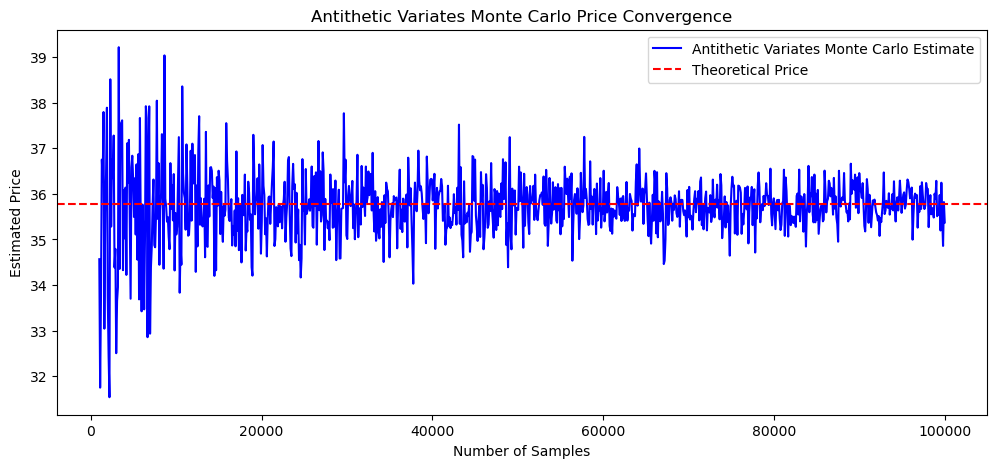

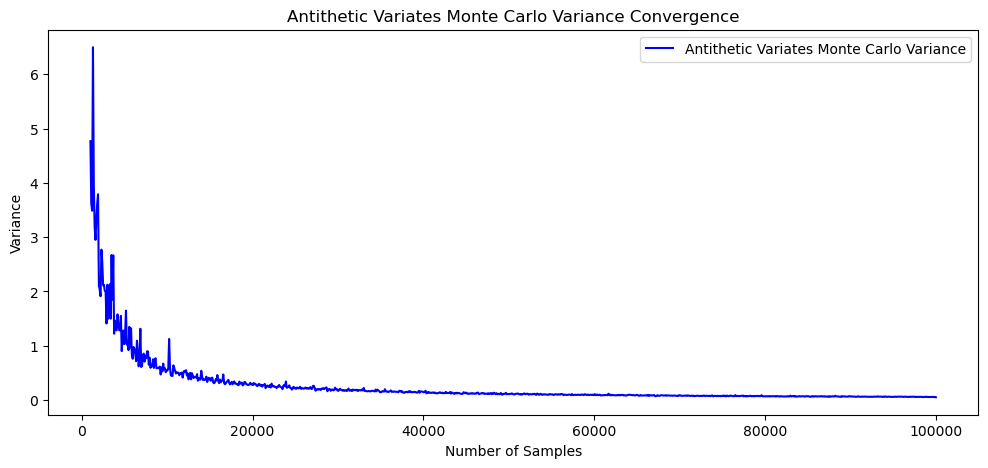

In [62]:
plot_mc_convergence(estimate_mc_antithetic, S0, T, K2, sigma, r, n, "Antithetic Variates Monte Carlo", theoretical_outofthemoney, 1000, 1000)

#### Stratified sampling

InTheMoney

Model: Stratified Sampling Monte Carlo
Option type: In-the-money
Parameters: S0=100, K=80, sigma=1, r=0.1, T=1, num_samples=100000
Theoretical value: 48.3660
Estimated value: 48.2833
Variance: 0.0013
--------------------------------------------------


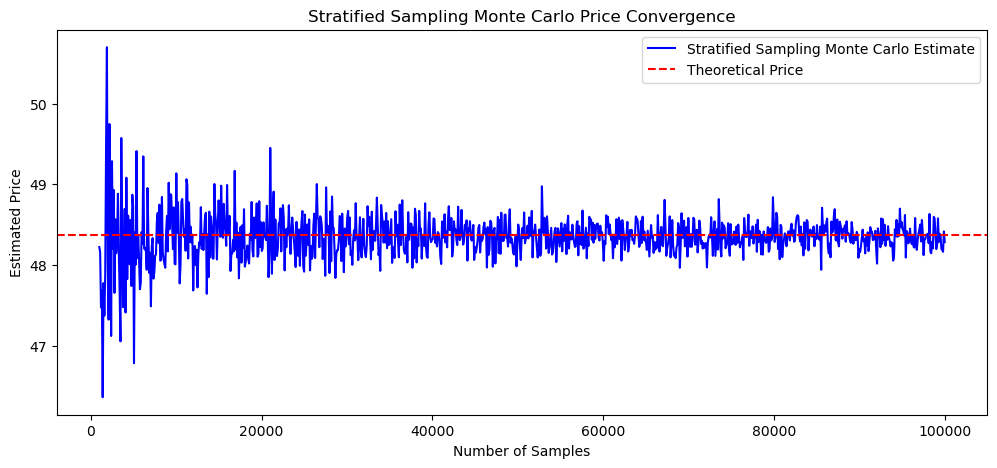

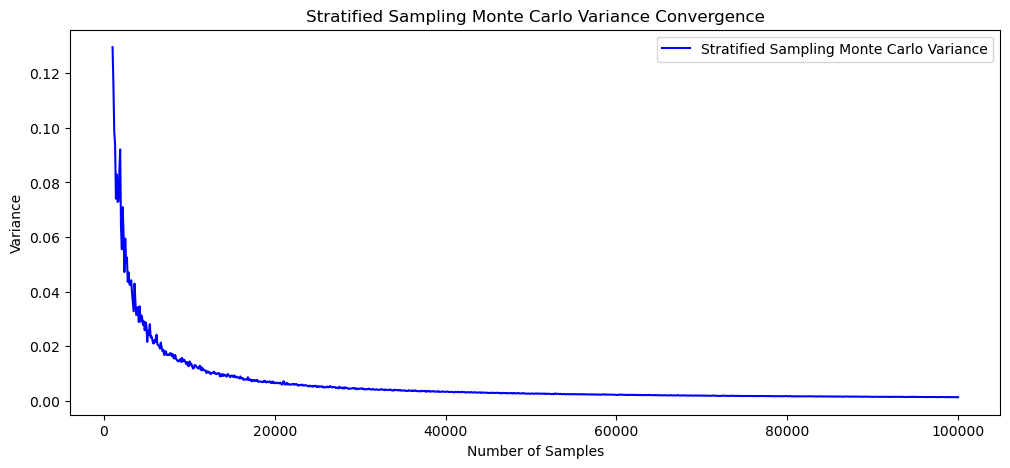

In [66]:
plot_mc_convergence(estimate_mc_stratified, S0, T, K1, sigma, r, n, "Stratified Sampling Monte Carlo", theoretical_inthemoney, 1000, 1000)

OutOfTheMoney

Model: Stratified Monte Carlo
Option type: Out-of-the-money
Parameters: S0=100, K=120, sigma=1, r=0.1, T=1, num_samples=100000
Theoretical value: 35.7693
Estimated value: 35.7049
Variance: 0.0011
--------------------------------------------------


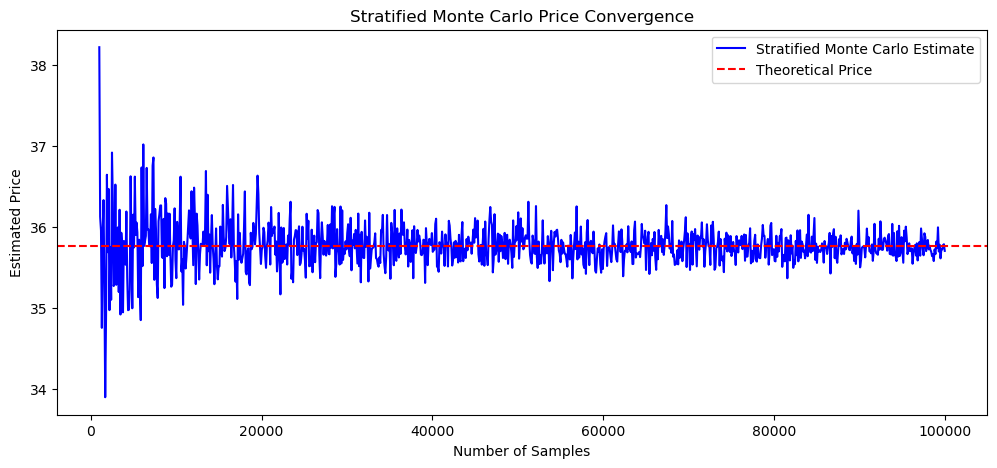

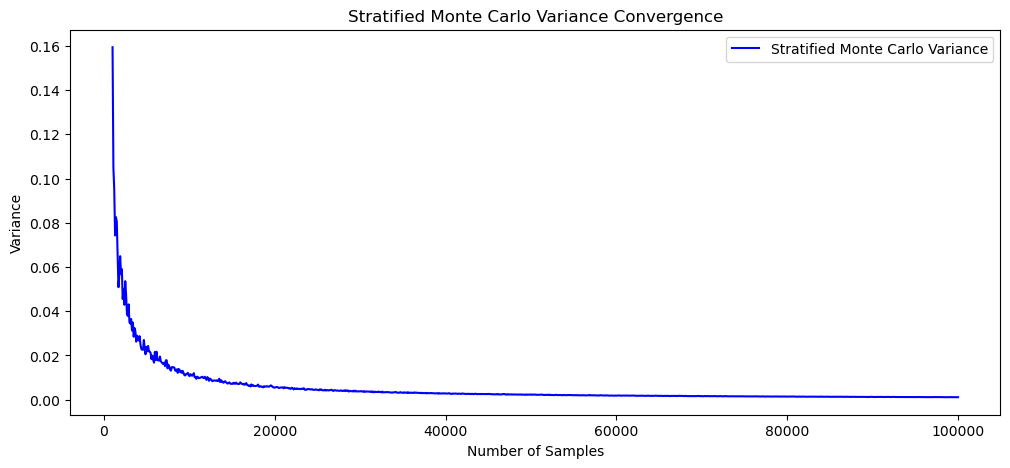

In [67]:
plot_mc_convergence(estimate_mc_stratified, S0, T, K2, sigma, r, n, "Stratified Monte Carlo", theoretical_outofthemoney, 1000, 1000)

#### Importance sampling

Let's find mu that minimizes variance.

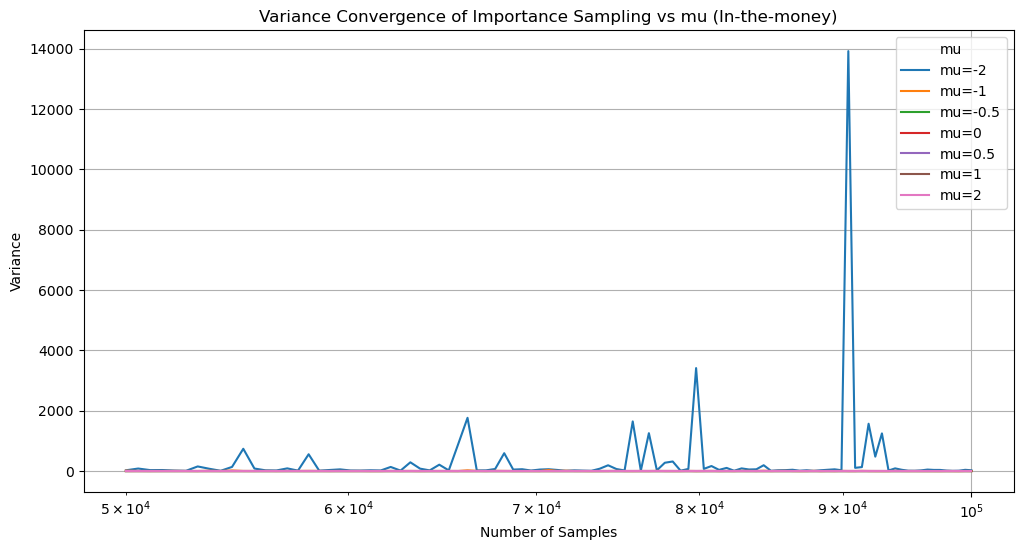

Average variances in final 10 numbers of samples
mu=-2:  var = 27.63921782
mu=-1:  var = 3.63212931
mu=-0.5:  var = 0.67797681
mu=0:  var = 0.14783464
mu=0.5:  var = 0.04006660
mu=1:  var = 0.01114263
mu=2:  var = 0.00784306


In [107]:
plot_importance_sampling_variance([ -2, -1, -0.5, 0, 0.5, 1, 2], S0, T, K1, sigma, r, start_plot=50_000)

Tests show that preferable mu = 2 (set as default).

Model: Importance Sampling Monte Carlo
Option type: In-the-money
Parameters: S0=100, K=80, sigma=1, r=0.1, T=1, num_samples=1000000
Theoretical value: 48.3660
Estimated value: 48.3790
Variance: 0.0008
--------------------------------------------------


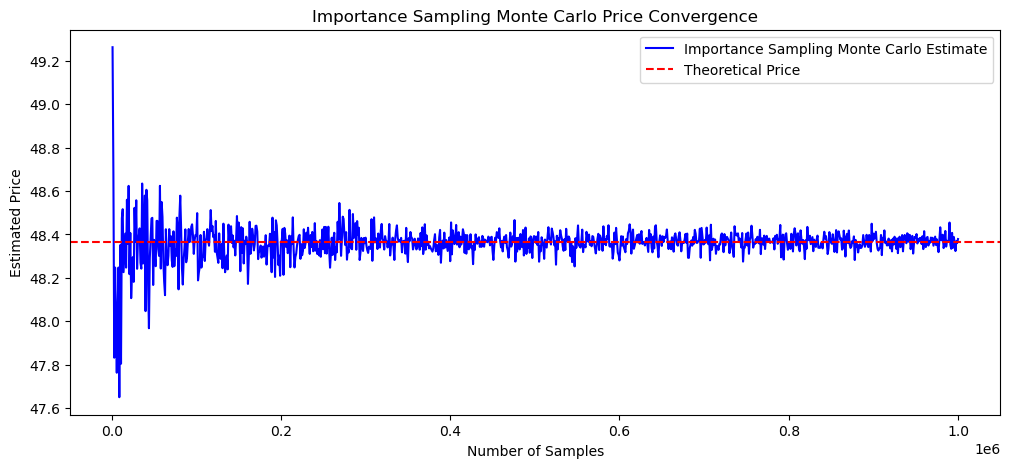

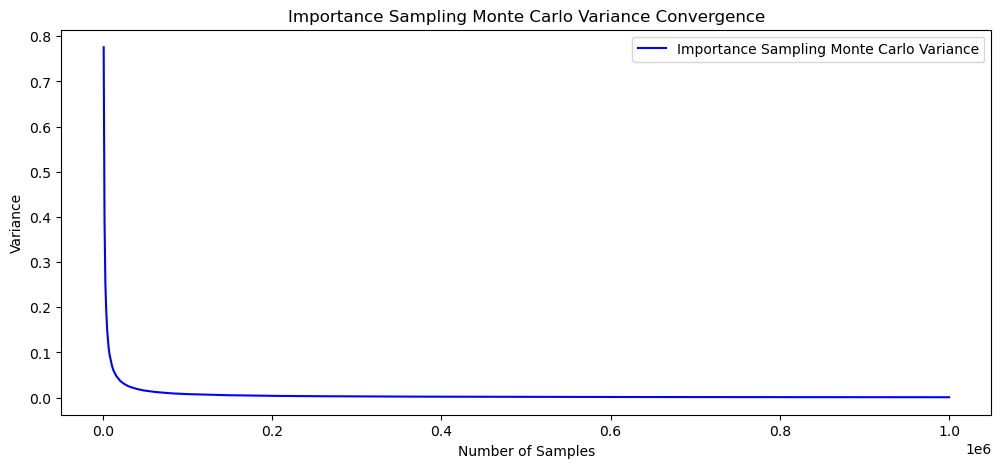

In [110]:
plot_mc_convergence(estimate_mc_importance_sampling, S0, T, K1, sigma, r, n, "Importance Sampling Monte Carlo", theoretical_inthemoney, 1000, 1000)

OutOfTheMoney

Model: Control Variates Monte Carlo
Option type: Out-of-the-money
Parameters: S0=100, K=120, sigma=1, r=0.1, T=1, num_samples=1000000
Theoretical value: 35.7693
Estimated value: 35.8019
Variance: 0.0004
--------------------------------------------------


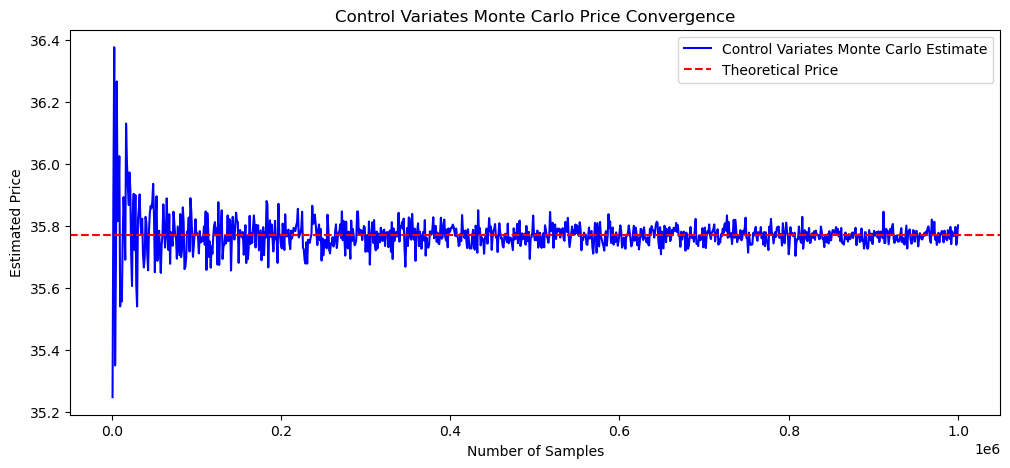

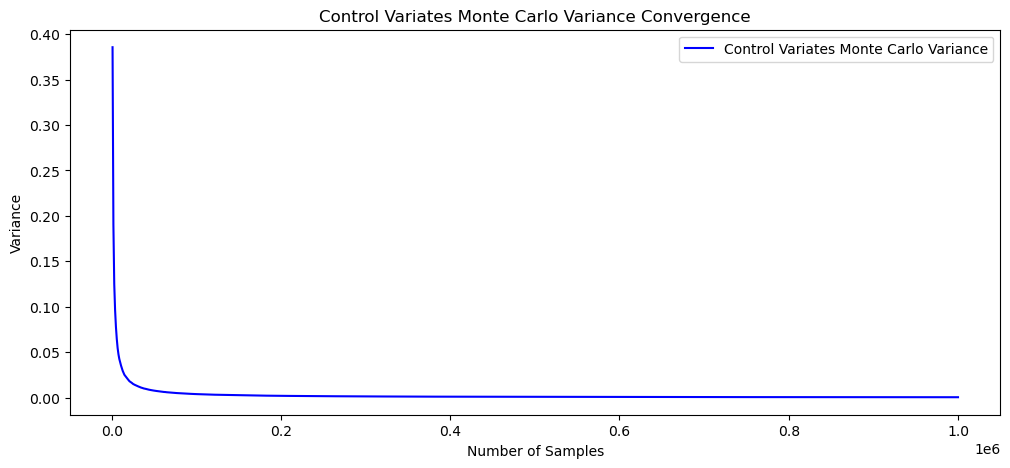

In [111]:
plot_mc_convergence(estimate_mc_importance_sampling, S0, T, K2, sigma, r, n, "Control Variates Monte Carlo", theoretical_outofthemoney, 1000, 1000)

#### Analysis and conclusions

Convergence comparison

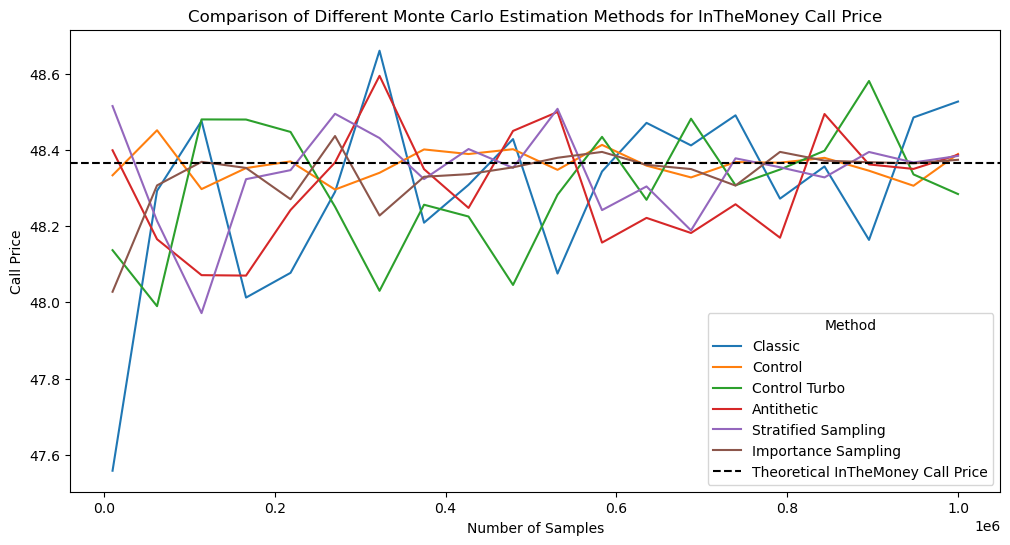

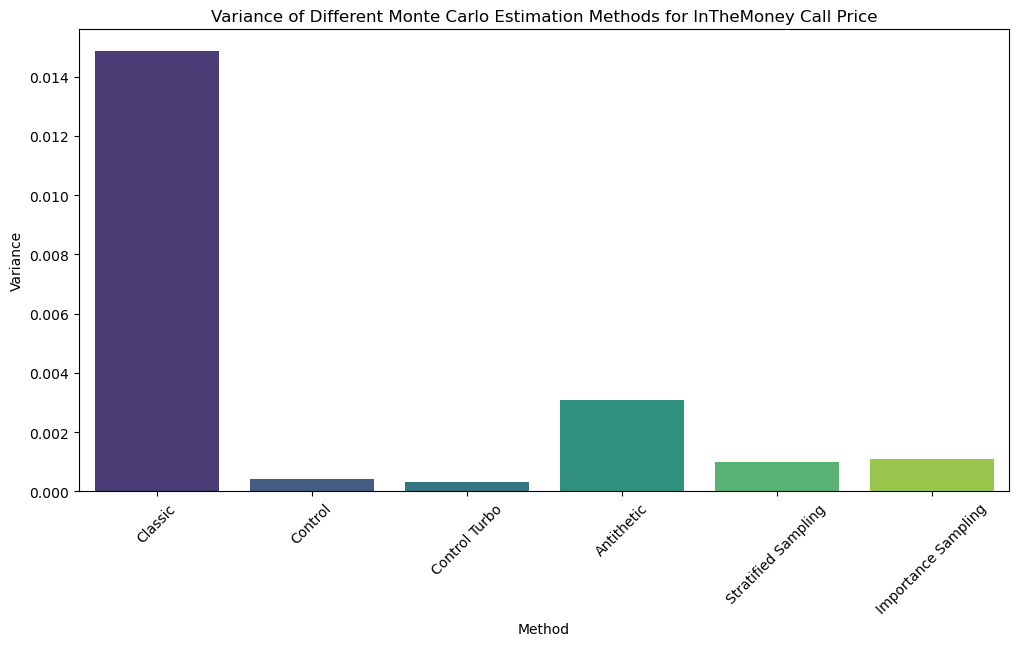

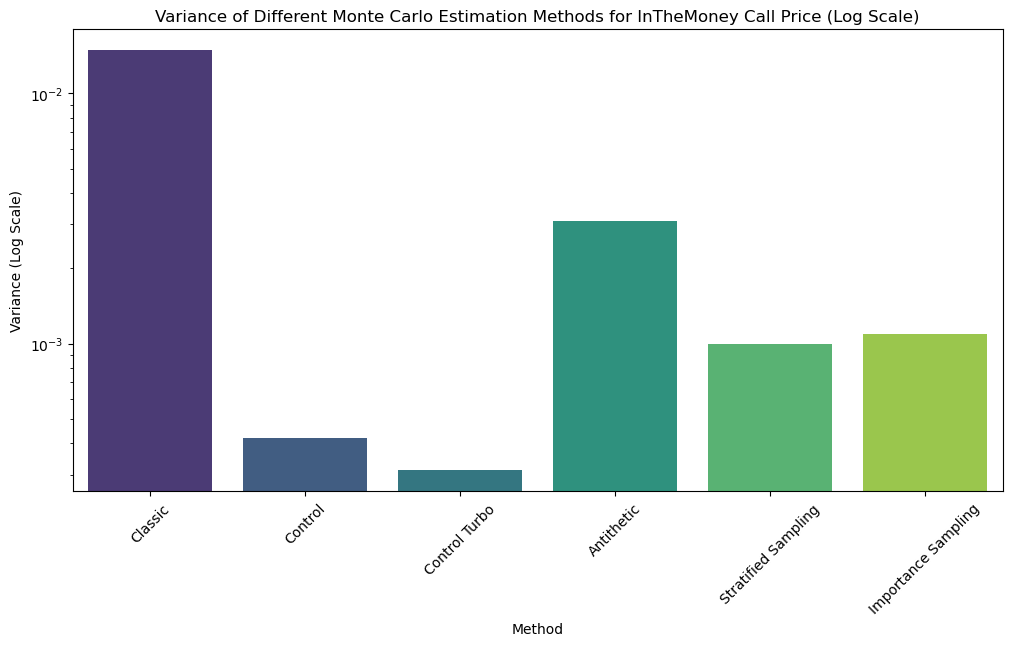

In [6]:
N = 20
start_plot = 10_000
num_samples = 1_000_000
sample_sizes = np.linspace(start_plot, num_samples, N, dtype=int)

methods = {
    'Classic': estimate_mc_classic,
    'Control': estimate_mc_control_variates,
    'Control Turbo': estimate_mc_control_turbo,
    'Antithetic': lambda S0, T, K, sigma, r, n: estimate_mc_antithetic(S0, T, K, sigma, r, 2*n),
    'Stratified Sampling': lambda S0, T, K, sigma, r, n: estimate_mc_stratified(S0, T, K, sigma, r, n, k=10),
    'Importance Sampling': lambda S0, T, K, sigma, r, n: estimate_mc_importance_sampling(S0, T, K, sigma, r, n, mu=1)
}

convergence = {}
variances = {}

for name, estimator in methods.items():
    estimates = []
    vars_ = []
    for n in sample_sizes:
        res, var = estimator(S0, T, K1, sigma, r, n)
        estimates.append(res)
        vars_.append(var)
    convergence[name] = estimates
    variances[name] = vars_[-1]

plt.figure(figsize=(12, 6))
for name in methods.keys():
    plt.plot(sample_sizes, convergence[name], label=name)
plt.axhline(bs_call(S0, T, K1, sigma, r), color='black', linestyle='dashed', label='Theoretical InTheMoney Call Price')
plt.title('Comparison of Different Monte Carlo Estimation Methods for InTheMoney Call Price')
plt.xlabel('Number of Samples')
plt.ylabel('Call Price')
plt.legend(title='Method')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=list(variances.keys()), y=list(variances.values()), palette='viridis')
plt.title('Variance of Different Monte Carlo Estimation Methods for InTheMoney Call Price')
plt.ylabel('Variance')
plt.xlabel('Method')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=list(variances.keys()), y=list(variances.values()), palette='viridis')
plt.yscale('log')
plt.title('Variance of Different Monte Carlo Estimation Methods for InTheMoney Call Price (Log Scale)')
plt.ylabel('Variance (Log Scale)')
plt.xlabel('Method')
plt.xticks(rotation=45)
plt.show()

Variance comparison: multiple tests (100)

In [ ]:

def run_tests(n_tests, n, S0, T, K, stratums = 100, mu = 1):
    results_mean = []
    results_var = []
    for i in range(n_tests):
        e0, v0 = estimate_mc_classic(S0, T, K, sigma, r, n)
        e1, v1 = estimate_mc_control_variates(S0, T, K, sigma, r, n)
        e2, v2 = estimate_mc_control_turbo(S0, T, K, sigma, r, n)
        e3, v3 = estimate_mc_antithetic(S0, T, K, sigma, r, 2*n)
        e4, v4 = estimate_mc_stratified(S0, T, K, sigma, r, n, k=stratums)
        e5, v5 = estimate_mc_importance_sampling(S0, T, K, sigma, r, n, mu=mu)

        results_mean.append({
            "classic": e0,
            "control_variates": e1,
            "control_turbo": e2,
            "antithetic": e3,
            "stratified_sampling": e4,
            "importance_sampling": e5
        })
        results_var.append({
            "classic": v0,
            "control_variates": v1,
            "control_turbo": v2,
            "antithetic": v3,
            "stratified_sampling": v4,
            "importance_sampling": v5
        })
    return pd.DataFrame(results_mean), pd.DataFrame(results_var)

def plot_results(n_tests, n, S0, T, K, stratums = 100, mu = 1):
    res_mean, res_var = run_tests(n_tests, n, S0, T, K, stratums, mu)
    
    call_type = "InTheMoney" if K < S0 else "OutOfTheMoney"
    
    plt.figure(figsize=(12,6))
    sns.violinplot(data=res_mean, palette='viridis')
    plt.title(f'Estimations  of {call_type} Call Prices for Different Monte Carlo Methods')
    plt.hlines(bs_call(S0, T, K, sigma, r), 0, 5, colors='r', linestyles='dashed', label='Theoretical Call Price');
    plt.ylabel('Call Price')
    plt.xlabel('Method')
    plt.xticks(rotation=45)
    plt.show()
    
    plt.figure(figsize=(12,6))
    sns.boxplot(data=res_var, palette='viridis')
    plt.title(f'Variance of {call_type} Call Prices for Different Monte Carlo Methods')
    plt.ylabel('Variance')
    plt.xlabel('Method')
    plt.xticks(rotation=45)
    plt.show()
    
    plt.figure(figsize=(12,6))
    sns.boxplot(data=res_var, palette='viridis')
    plt.yscale('log')
    plt.title(f'Variance of {call_type} Call Prices for Different Monte Carlo Methods (Log Scale)')
    plt.ylabel('Variance (Log Scale)')
    plt.xlabel('Method')
    plt.xticks(rotation=45)
    plt.show()
    
    classic_var_mean = res_var["classic"].mean()
    print("Average variance reduction compared to the classic approach:\n")
    for method in ["control_variates", "control_turbo", "antithetic", "stratified_sampling", "importance_sampling"]:
        method_var_mean = res_var[method].mean()
        reduction = classic_var_mean / method_var_mean if method_var_mean != 0 else float('inf')
        print(f"- {method.replace('_', ' ').title():<22}: {reduction:8.2f}x lower variance")


InTheMoney 

/Users/gasparsekula/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


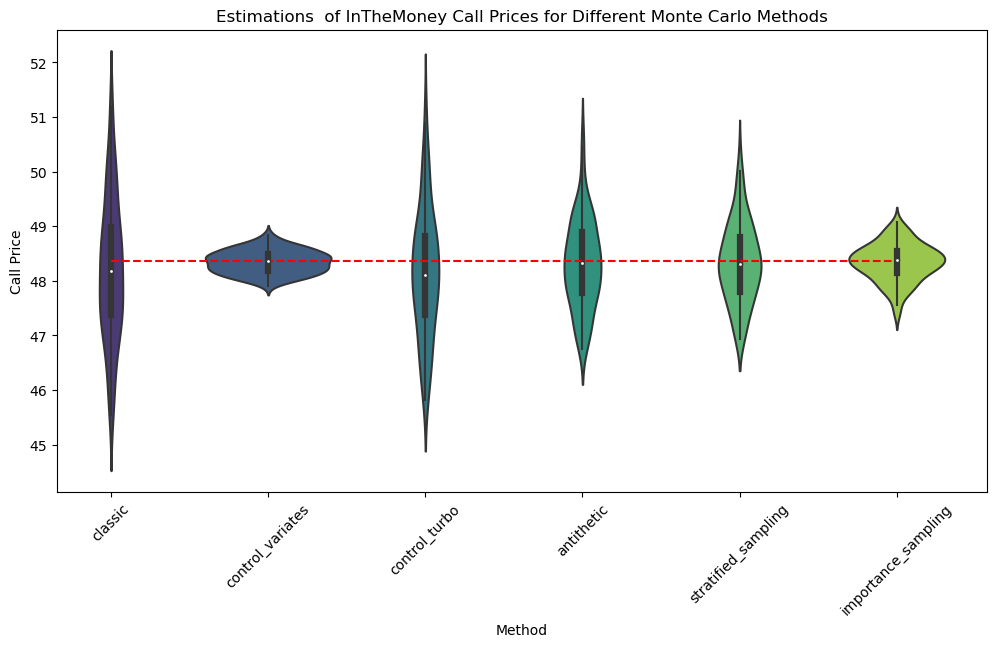

/Users/gasparsekula/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


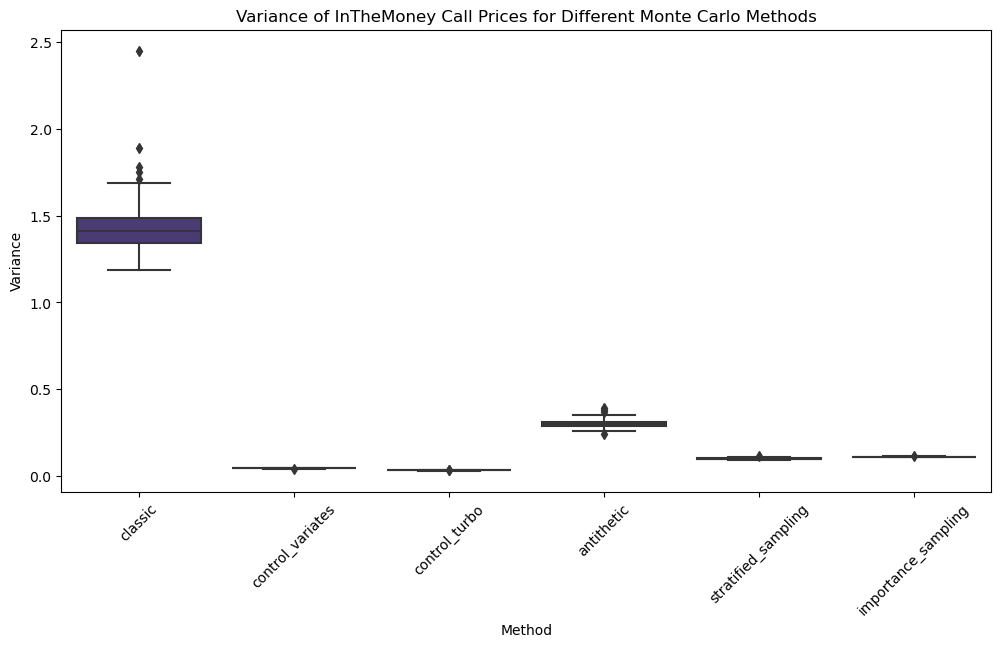

/Users/gasparsekula/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


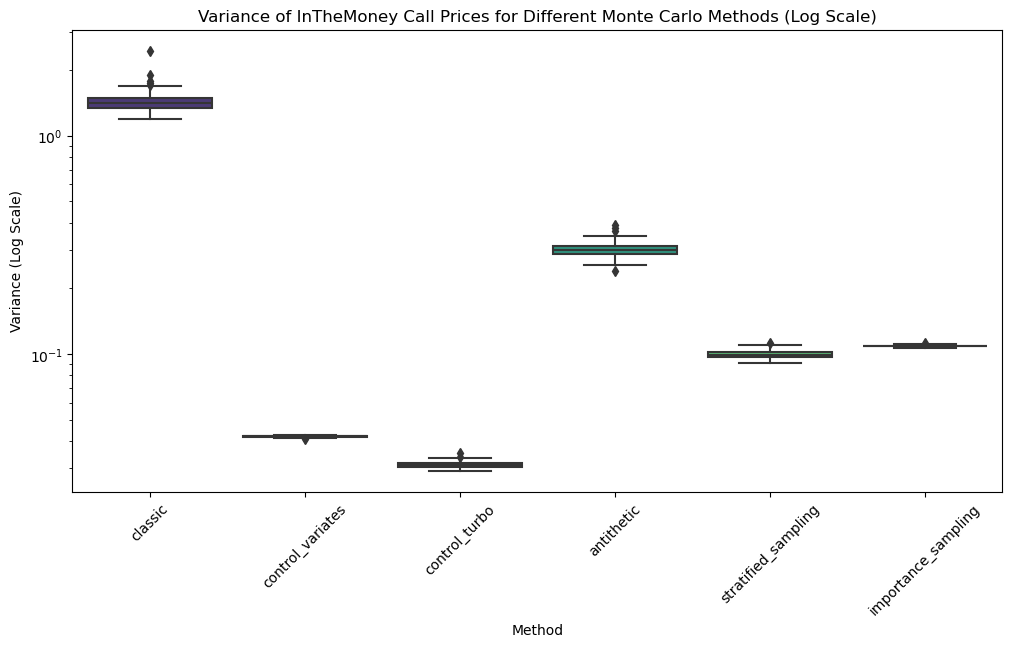

Average variance reduction compared to the classic approach:

- Control Variates      :    34.18x lower variance
- Control Turbo         :    46.13x lower variance
- Antithetic            :     4.77x lower variance
- Stratified Sampling   :    14.42x lower variance
- Importance Sampling   :    13.19x lower variance


In [114]:
plot_results(n_tests=100, n=10_000, S0=S0, T=T, K=K1, stratums=10, mu=1)

OutOfTheMoney

/Users/gasparsekula/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


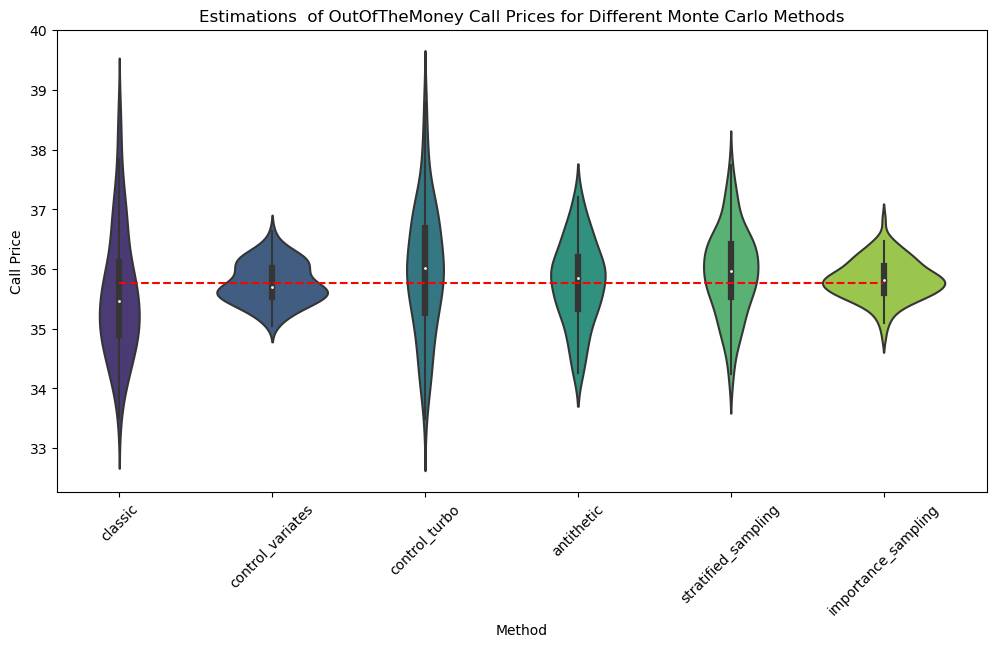

/Users/gasparsekula/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


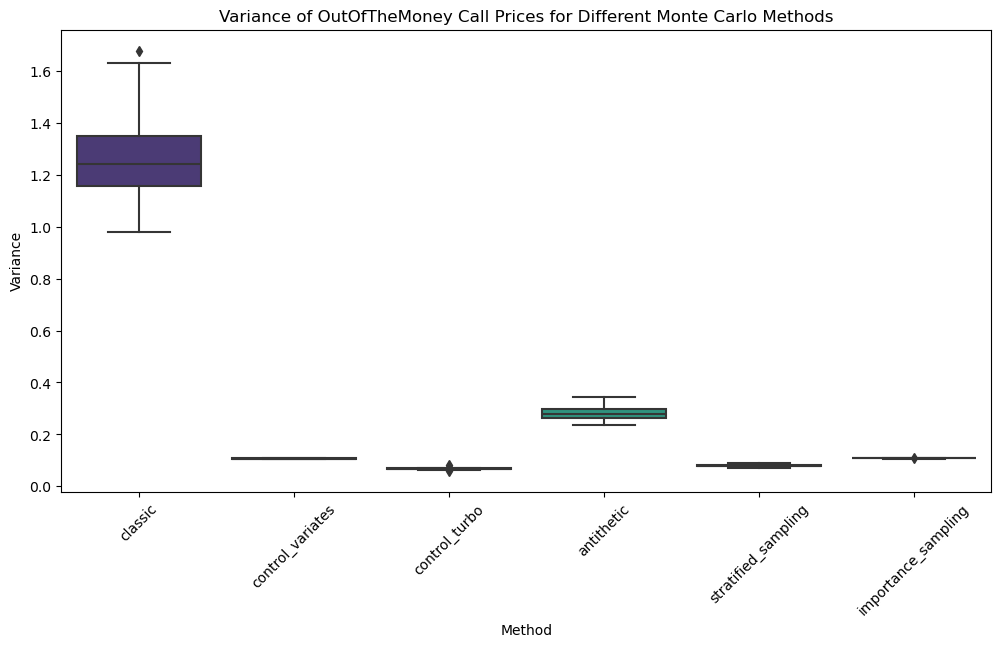

/Users/gasparsekula/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


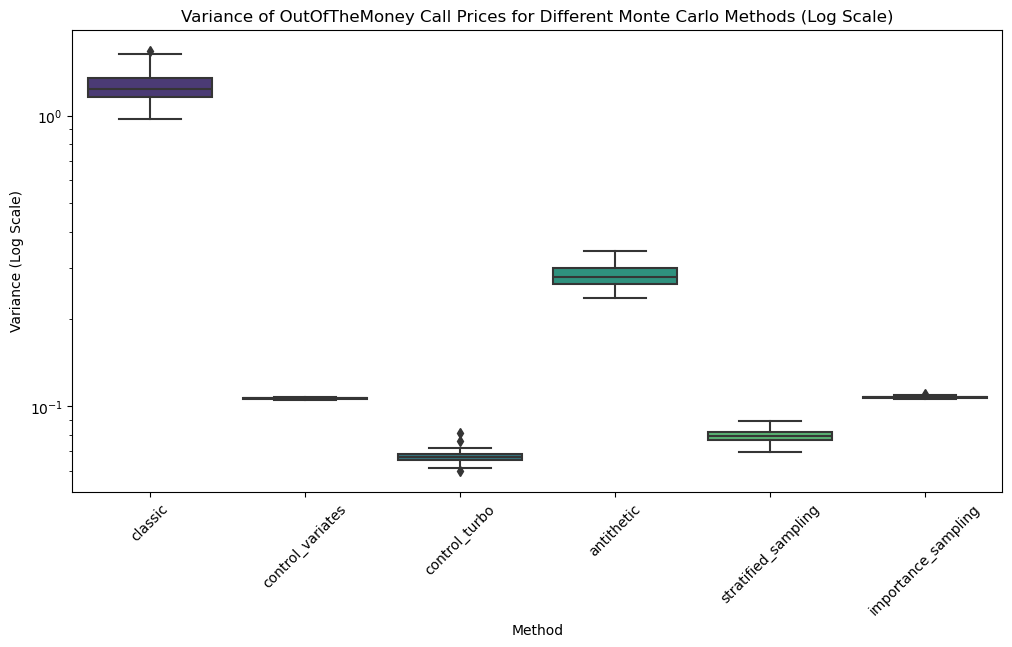

Average variance reduction compared to the classic approach:

- Control Variates      :    11.80x lower variance
- Control Turbo         :    18.77x lower variance
- Antithetic            :     4.47x lower variance
- Stratified Sampling   :    15.89x lower variance
- Importance Sampling   :    11.68x lower variance


In [115]:
plot_results(n_tests=100, n=10_000, S0=S0, T=T, K=K2, stratums=10, mu=1)

## Asian option price

Here, two approaches will be implemented:
- classical "vanilla" Monte Carlo,
- control variates with controlling variate $Y$

$$ Y = \left( \left( \prod_{i=1}^{N} S_{T_i} \right)^{1/N} - K \right)^+ $$

We know that: 
 $$G = \left(  \prod_{i=1}^{N} S_{T_i} \right)^{1/N} =  \left(  \prod_{i=1}^{N} S_0 \cdot exp\left( \sigma W_{t_i} + (r - \sigma^2/2)t_i \right) \right)^{1/N} = \dots = \\ = exp \left( \left( \sigma/N  \sum^N_{i=1}W_{t_i} \right) + \left( \frac{r - \sigma^2/2}{N} \sum^N_{i=1}t_i \right) + ln(S_0) \right),$$

so 
$$
\beta = ln(S_0) + \frac{r - \sigma^2/2}{N} \sum^N_{i=1}t_i
$$
and because of the fact that
$$ln(S_{T_i}) = ln(S_0) + \sigma W_{T_i} + \left( r - \frac{\sigma^2}{2} \right) T_i $$
we can conclude
$$
\alpha^2 = \operatorname{Var}\left( ln\left( \left( \prod_{i=1}^{N} S_{T_i} \right)^{1/N} \right) \right)
= \operatorname{Var}\left( \frac{1}{N} \sum_{i=1}^{N} ln S_{T_i} \right)
= \operatorname{Var}\left( \frac{\sigma}{N} \sum_{i=1}^{N} W_{T_i} \right)
=\\ = \frac{\sigma^2}{N^2} \operatorname{Var}\left( \sum_{i=1}^{N} W_{T_i} \right) = \mathrm{Var}\left( \frac{\sigma}{N} \sum_{i=1}^{N} W_{T_i} \right) 
=\\= \frac{\sigma^2}{N^2} \left( \sum_{i=1}^{N} \mathrm{Var}(W_{T_i}) + 2 \sum_{1 \le i < j \le N} \mathrm{Cov}(W_{T_i}, W_{T_j}) \right)
$$

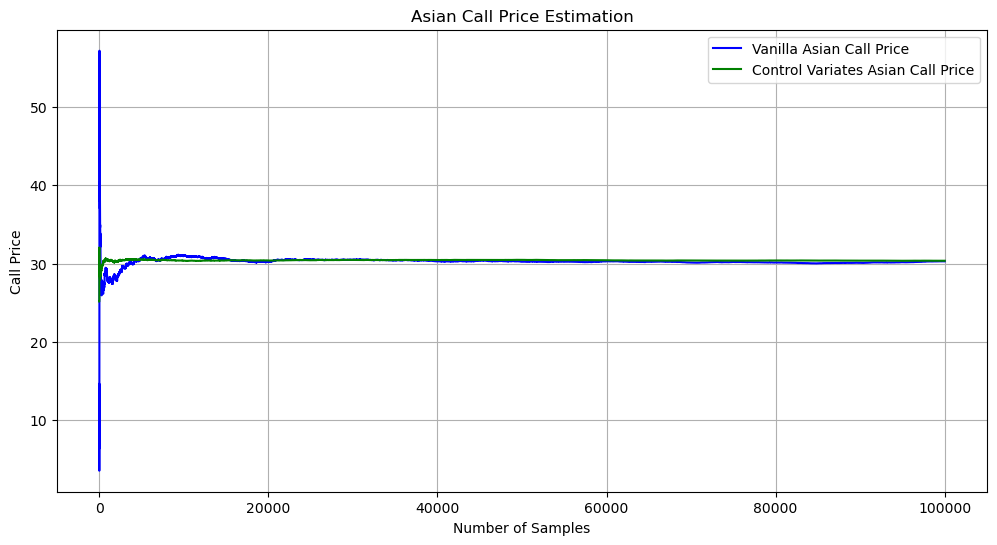

Vanilla Asian Call Price: 30.29, variance: 0.02766
Control Variates Asian Call Price: 30.36, variance: 0.00163
With Control Variates, the variance is approx. 16.97 times lower.


In [201]:
bsa = BSAsianOption(S0=100, T=1, K=80, r=0.1, sigma=1)

e1, v1 = bsa.estimate_mc_vanilla()
e2, v2 = bsa.estimate_mc_control()

plt.figure(figsize=(12, 6))
plt.plot(e1, label='Vanilla Asian Call Price', color='b')
plt.plot(e2, label='Control Variates Asian Call Price', color='g')
plt.title('Asian Call Price Estimation')
plt.xlabel('Number of Samples')
plt.ylabel('Call Price')
plt.legend()
plt.grid(True)
plt.show();

print(f"Vanilla Asian Call Price: {e1[-1]:.2f}, variance: {v1:.5f}")
print(f"Control Variates Asian Call Price: {e2[-1]:.2f}, variance: {v2:.5f}")
print(f"With Control Variates, the variance is approx. {v1/v2:.2f} times lower.")

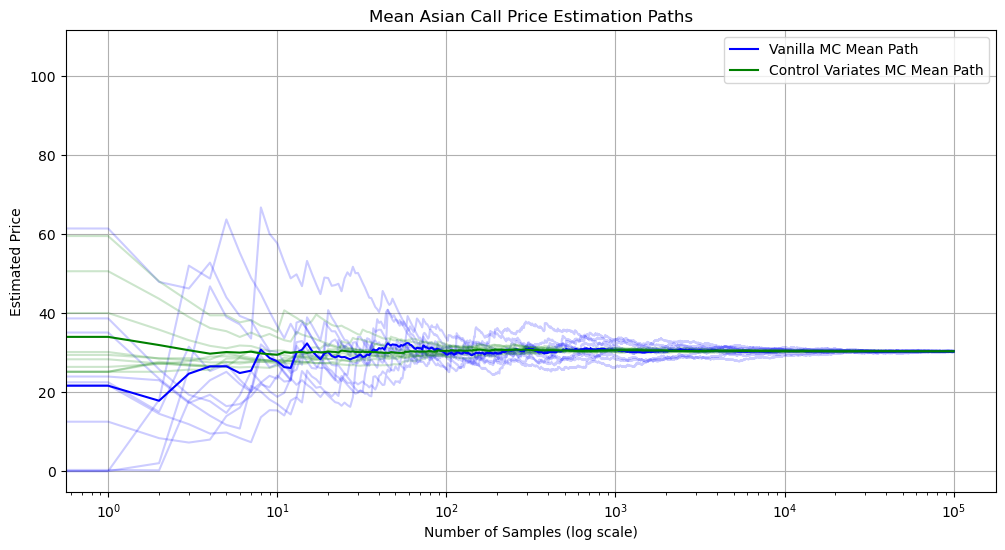

Mean variance for vanilla Monte Carlo = 0.0278
Mean variance for control variates MC = 0.0017
Control variates has on average 16.05 lower variance.


In [202]:
x = np.arange(1, n)
vanilla_paths, vanilla_vars, control_paths, control_vars = [], [], [], []
bsa = BSAsianOption(S0=100, T=1, K=80, r=0.1, sigma=1)

for _ in range(10):
    path_v, var_v = bsa.estimate_mc_vanilla()
    path_c, var_c = bsa.estimate_mc_control()
    vanilla_paths.append(path_v)
    vanilla_vars.append(var_v)
    control_paths.append(path_c)
    control_vars.append(var_c)
    
vanilla_mean_path = np.mean(np.vstack(vanilla_paths), axis=0)
control_mean_path = np.mean(np.vstack(control_paths), axis=0)
vanilla_mean_var = np.mean(np.array(vanilla_vars))
control_mean_var = np.mean(np.array(control_vars))


plt.figure(figsize=(12, 6))
for path in vanilla_paths:
    plt.plot(path, color='blue', alpha=0.2)
for path in control_paths:
    plt.plot(path, color='green', alpha=0.2)
plt.plot(vanilla_mean_path, label='Vanilla MC Mean Path', color='blue')
plt.plot(control_mean_path, label='Control Variates MC Mean Path', color='green')
plt.title('Mean Asian Call Price Estimation Paths')
plt.xlabel('Number of Samples (log scale)')
plt.ylabel('Estimated Price')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

print(f'Mean variance for vanilla Monte Carlo = {vanilla_mean_var:.4f}')
print(f'Mean variance for control variates MC = {control_mean_var:.4f}')
print(f'Control variates has on average {vanilla_mean_var/control_mean_var:.2f} lower variance.')

Even on the plot, we can see that control variates has significantly lower variance.

## Contitioned Option

Now we would like to discount option:
$$(K_1 - S_5 - S_{10})^+$$ 
with condition that at least 5 of $S_1,..., S_{10}$ are greater than $K_2$ 
$$| k \in \{1, ..., 10\} : S_k > K_2| \geq 5$$

in Black-Scholes model.


We use:
- vanilla MC,
- Antithetic Variates,
- Stratified Sampling.

Stratified sampling

We'll create strata based on number of crossings (0-5+). Since we need at least 5 crossings for payoff, we'll have:
- Strata 0: 0-4 crossings (no payoff)
- Strata 1: exactly 5 crossings
- Strata 2: exactly 6 crossing
- ...
- Strata n_strata-1: >= (4 + n_strata-1) crossings

In [11]:

class ConditionOptionPricer:
    def __init__(self, S0=100, sigma=1, r=0.1, K1=200, K2=100, T=10):
        self.S0 = S0
        self.sigma = sigma
        self.r = r
        self.K1 = K1
        self.K2 = K2
        self.T = T
        self.dt = 1.0
        self.n_steps = 10
        
    def generate_path(self, Z = None):
        if Z is None:
            Z = np.random.standard_normal(self.n_steps)
        # instead of loop, use vectorized operations -> faster
        log_prices = np.log(self.S0) + np.cumsum((self.r - 0.5 * self.sigma**2) * self.dt + self.sigma * np.sqrt(self.dt) * Z)
        prices = np.exp(log_prices)
        return prices
    
    def calculate_payoff(self, prices_path):
        condition_met_count = np.sum(prices_path > self.K2)
        condition = condition_met_count >= 5
        return condition * max(self.K1 - prices_path[4] - prices_path[9], 0), condition
    
    def estimate_mc_classic(self, num_simulations):
        payoffs = []
        condition_hits = []
        
        for _ in range(num_simulations):
            prices = self.generate_path()
            payoff, condition = self.calculate_payoff(prices)
            payoffs.append(payoff)
            condition_hits.append(condition)
            
        payoffs = np.array(payoffs)
        
        mean_payoff = np.mean(payoffs)
        option_price = np.exp(-self.r * self.T) * mean_payoff
        variance = np.var(payoffs, ddof=1) * np.exp(-2 * self.r * self.T) / num_simulations
        
        return {
            'price': option_price,
            'variance': variance,
            'payoffs': payoffs,
            'condition_probability': np.mean(condition_hits),
        }
        
    def estimate_mc_antithetic(self, num_simulations=100_000):
        payoffs = []
        condition_hits = []
        
        for _ in range(num_simulations // 2):
            Z = np.random.normal(0, 1, self.n_steps)
            prices1 = self.generate_path(Z)
            prices2 = self.generate_path(-Z)
            
            payoff1, condition1 = self.calculate_payoff(prices1)
            payoff2, condition2 = self.calculate_payoff(prices2)
            
            payoffs.append((payoff1 + payoff2) / 2)
            condition_hits.append(condition1 or condition2)
        
        payoffs = np.array(payoffs)
        
        mean_payoff = np.mean(payoffs)
        option_price = np.exp(-self.r * self.T) * mean_payoff
        variance = np.var(payoffs, ddof=1) * np.exp(-2 * self.r * self.T) / num_simulations
        
        return {
            'price': option_price,
            'variance': variance,
            'payoffs': payoffs,
            'condition_probability': np.mean(condition_hits),
        }
        
    def stratified_sampling_monte_carlo(self, n_simulations=100000, n_strata=6):
        strata_counts = np.zeros(n_strata, dtype=int)
        strata_payoffs = np.zeros(n_strata)
        strata_variances = np.zeros(n_strata)
        all_payoffs = []
        barrier_hits = []
        
        # stratum probabilities
        temp_payoffs = []
        temp_strata = []
        n_pilot = min(10000, n_simulations // 10)
        
        for _ in range(n_pilot):
            prices = self.generate_path()
            payoff, barrier_hit = self.calculate_payoff(prices)
            crossings = np.sum(prices > self.K2)
            if crossings < 5:
                stratum = 0
            elif crossings >= (4 + n_strata):
                stratum = n_strata - 1
            else:
                stratum = crossings - 4
            temp_payoffs.append(payoff)
            temp_strata.append(stratum)
        
        strata_probs = np.zeros(n_strata)
        for s in range(n_strata):
            strata_probs[s] = np.mean(np.array(temp_strata) == s)
        
        strata_probs = np.maximum(strata_probs, 0.00001)
        strata_probs = strata_probs / np.sum(strata_probs)
        
        strata_means = np.zeros(n_strata)
        strata_stds = np.zeros(n_strata)
        for s in range(n_strata):
            mask = (np.array(temp_strata) == s)
            if np.sum(mask) > 0:
                strata_means[s] = np.mean(np.array(temp_payoffs)[mask])
                strata_stds[s] = np.std(np.array(temp_payoffs)[mask])
            else:
                strata_means[s] = 0
                strata_stds[s] = 0
        
        # sample sizes
        optimal_alloc = (strata_probs * strata_stds) / np.sum(strata_probs * strata_stds)
        strata_samples = np.floor(n_simulations * optimal_alloc).astype(int)
        strata_samples = np.maximum(strata_samples, 2)
        strata_samples[-1] += n_simulations - np.sum(strata_samples)
        
        # sampling
        for stratum in range(n_strata):
            n_stratum_samples = strata_samples[stratum]
            strata_payoffs_stratum = []
            
            for _ in range(n_stratum_samples):
                while True:
                    prices = self.generate_path()
                    crossings = np.sum(prices > self.K2)
                    
                    if stratum == 0 and crossings < 5:
                        break
                    elif stratum == n_strata - 1 and crossings >= (4 + n_strata):
                        break
                    elif 1 <= stratum < n_strata - 1 and crossings == (4 + stratum):
                        break
                
                payoff, barrier_hit = self.calculate_payoff(prices)
                strata_payoffs_stratum.append(payoff)
                all_payoffs.append(payoff)
                barrier_hits.append(barrier_hit)
            
            strata_counts[stratum] = n_stratum_samples
            strata_payoffs[stratum] = np.mean(strata_payoffs_stratum)
            strata_variances[stratum] = np.var(strata_payoffs_stratum, ddof=1)
        
        stratified_mean = np.sum(strata_probs * strata_payoffs)
        stratified_variance = np.sum((strata_probs**2 * strata_variances) / strata_counts)
        
        option_price = np.exp(-self.r * self.T) * stratified_mean
        
        
        return {
            'price': option_price,
            'variance': stratified_variance,
            'payoffs': np.array(all_payoffs),
            'condition_probability': np.mean(barrier_hits),
        }
            
        
    def compare_methods(self, num_simulations=100_000):
        print('-- Conditioned Oprion Pricing Comparison --')
        print(f"* Parameters: S0={self.S0}, K1={self.K1}, K2={self.K2}, r={self.r}, sigma={self.sigma}, T={self.T}")
        print(f"* Number of Simulations: {num_simulations}")
        
        methods = {
            'Classic': self.estimate_mc_classic,
            'Antithetic': self.estimate_mc_antithetic,
            'Stratified': self.stratified_sampling_monte_carlo
        }
        
        results = {}
        
        for name, method in methods.items():
            res = method(num_simulations)
            results[name] = res
            
            print('\n')
            print(f'{name} method:')
            print(f"  - Price: {res['price']:.4f}")
            print(f"  - Variance: {res['variance']:.4f}")
            print(f"  - Condition Probability: {res['condition_probability']:.4f}")
        return results
    
    def plot_results(self, min_simulations=50_000, max_simulations=1_000_000, n_points=10):
        simulation_sizes = np.logspace(np.log10(min_simulations), np.log10(max_simulations), n_points, dtype=int)
        
        methods = {
            'Classic': self.estimate_mc_classic,
            'Antithetic': self.estimate_mc_antithetic,
            'Stratified': self.stratified_sampling_monte_carlo
        }
        
        convergence_data = {name: {'sizes': [], 'prices': [], 'variances': []} for name in methods.keys()}
        
        for size in simulation_sizes:
            print(f"Running simulations for {size:,} samples...")
            
            for name, method in methods.items():
                res = method(size)
                convergence_data[name]['sizes'].append(size)
                convergence_data[name]['prices'].append(res['price'])
                convergence_data[name]['variances'].append(res['variance'])
                
        print("Option Price Convergence Plot")
        plt.figure(figsize=(12, 6))
        for name, data in convergence_data.items():
            plt.plot(data['sizes'], data['prices'], 'o-', label=name)
        plt.xlabel('Number of Simulations')
        plt.ylabel('Estimated Contitioned Option Price')
        plt.title('Conditioned Option Price Convergence')
        plt.legend()
        plt.grid(True)
        plt.show()
        
       
        
    def run_tests(self, n_tests=10, n_simulations=100_000):
        results = {'Classic': [], 'Antithetic': [], 'Stratified': []}
        variances = {'Classic': [], 'Antithetic': [], 'Stratified': []}

        for _ in range(n_tests):
            res_classic = self.estimate_mc_classic(n_simulations)
            res_anti = self.estimate_mc_antithetic(n_simulations)
            res_strat = self.stratified_sampling_monte_carlo(n_simulations)
            results['Classic'].append(res_classic['price'])
            results['Antithetic'].append(res_anti['price'])
            results['Stratified'].append(res_strat['price'])
            variances['Classic'].append(res_classic['variance'])
            variances['Antithetic'].append(res_anti['variance'])
            variances['Stratified'].append(res_strat['variance'])


        plt.figure(figsize=(10, 5))
        sns.violinplot(data=[results['Classic'], results['Antithetic'], results['Stratified']],
                       palette='viridis')
        plt.xticks([0, 1, 2], ['Classic', 'Antithetic', 'Stratified'])
        plt.ylabel('Estimated Option Price')
        plt.title('Distribution of Estimated Option Prices')
        plt.grid(True, axis='y')
        plt.show()

        plt.figure(figsize=(8, 5))
        sns.boxplot(data=[variances['Classic'], variances['Antithetic'], variances['Stratified']],
                    palette='viridis')
        plt.xticks([0, 1, 2], ['Classic', 'Antithetic', 'Stratified'])
        plt.ylabel('Variance')
        plt.title('Variance of Estimated Option Price')
        plt.grid(True, axis='y')
        plt.show()

        classic_var = np.mean(variances['Classic'])
        anti_var = np.mean(variances['Antithetic'])
        strat_var = np.mean(variances['Stratified'])
        print("Average variance reduction ratio (vs Classic):")
        print(f"  Antithetic: {classic_var / anti_var:.2f}x")
        print(f"  Stratified: {classic_var / strat_var:.2f}x")
        

In [12]:
pricer = ConditionOptionPricer(S0=100, sigma=1, r=0.1, K1=200, K2=100, T=10)

In [13]:
res = pricer.compare_methods(num_simulations=100_000)

-- Conditioned Oprion Pricing Comparison --
* Parameters: S0=100, K1=200, K2=100, r=0.1, sigma=1, T=10
* Number of Simulations: 100000


Classic method:
  - Price: 0.6719
  - Variance: 0.0002
  - Condition Probability: 0.1638


Antithetic method:
  - Price: 0.6677
  - Variance: 0.0001
  - Condition Probability: 0.3265


Stratified method:
  - Price: 0.6864
  - Variance: 0.0001
  - Condition Probability: 1.0000


Condition probability in Stratified is biased here because of the while loop.

Running simulations for 49,999 samples...
Running simulations for 58,326 samples...
Running simulations for 68,039 samples...
Running simulations for 79,370 samples...
Running simulations for 92,587 samples...
Running simulations for 108,005 samples...
Running simulations for 125,992 samples...
Running simulations for 146,973 samples...
Running simulations for 171,448 samples...
Running simulations for 200,000 samples...
Option Price Convergence Plot


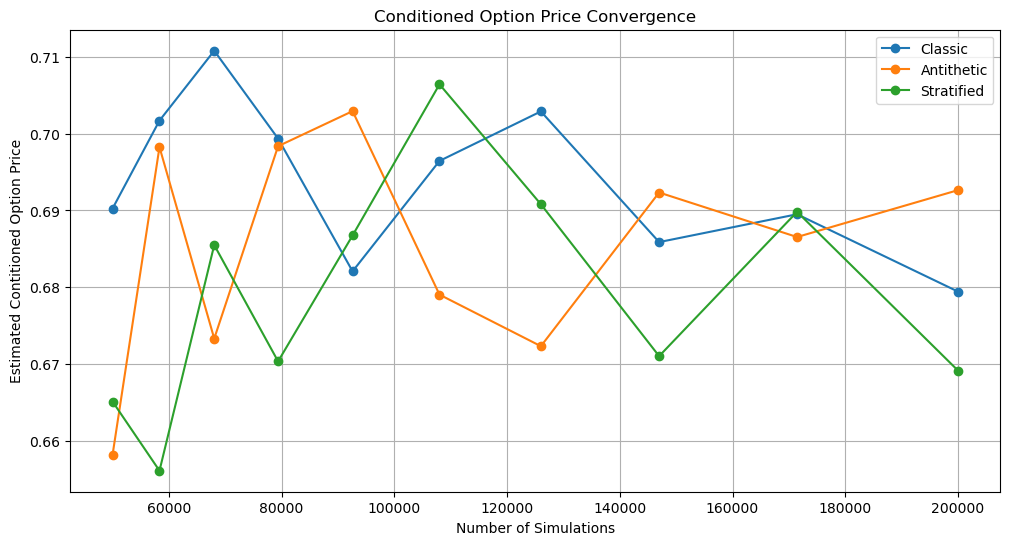

In [10]:
pricer.plot_results(max_simulations=200_000, n_points=10)

Nothing special.

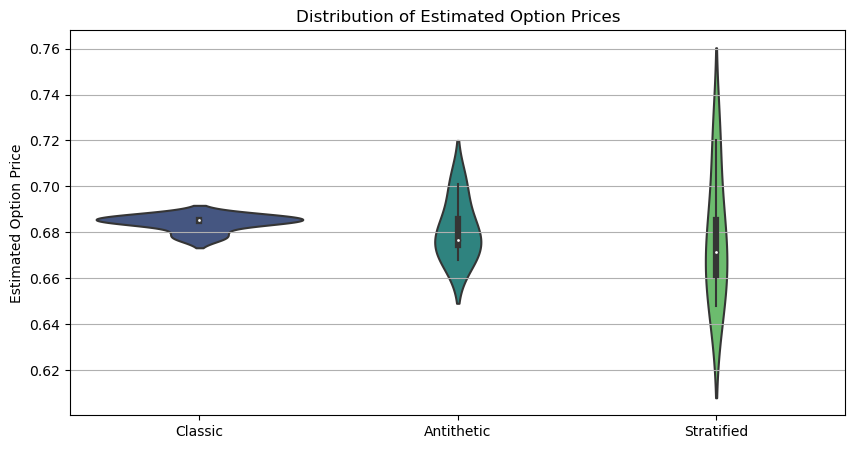

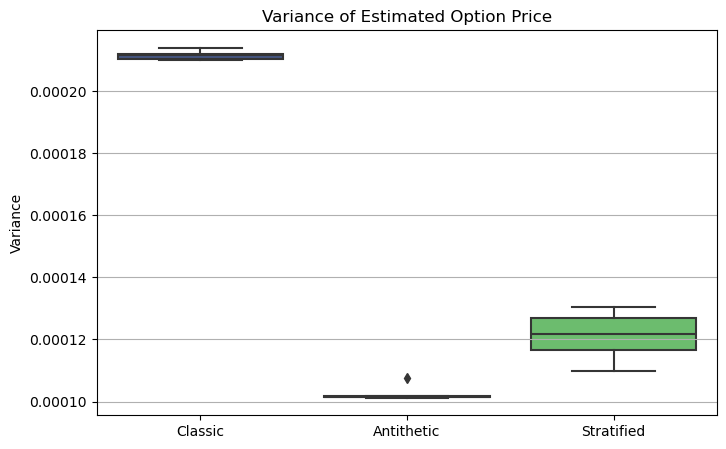

Average variance reduction ratio (vs Classic):
  Antithetic: 2.06x
  Stratified: 1.75x


In [233]:
pricer.run_tests(n_tests=5, n_simulations=100_000)

Still, great results.